1.	Data Acquistion - OK
2.	Exploratory data analysis Analysis 
2.1.	Statistical data analysis - OK
2.2.	Investigating Outliers - OK
2.3.	Investigating Missing Values - OK
3.	Data Preprocessing
3.1.	Timeseries Missing Value Treatment - No missing values
3.2.	Timeseries Outliers handling - Couldn't make it
3.3.	Convert timestemps and dataset index - OK
4.	Most correlated columns Variables Selection - OK
5.	Data Transformation... - Not sure about this

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import matplotlib as mpl
from histograms import histograms


from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix


from sklearn import datasets
from sklearn.datasets import make_classification

C:\ProgramData\Anaconda3\lib\site-packages\histograms\utils.py:6: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import MultiIndex


In [48]:
ff_dataset = pd.read_csv("Google_2012-2016.csv");
ff_dataset.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [49]:
ff_dataset.tail()

,Date,Open,High,Low,Close,Volume
1253,12/23/2016,790.90,792.74,787.28,789.91,"623,400"
1254,12/27/2016,790.68,797.86,787.66,791.55,"789,100"
1255,12/28/2016,793.70,794.23,783.20,785.05,"1,153,800"
1256,12/29/2016,783.33,785.93,778.92,782.79,"744,300"
1257,12/30/2016,782.75,782.78,770.41,771.82,"1,770,000"


In [53]:
ff_dataset.describe()

,Open,High,Low,Close,Volume
count,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03
mean,533.709833,537.880223,529.007409,712.669666,3.158107e+06
std,151.904442,153.008811,150.552807,164.752591,2.273726e+06
min,279.120000,281.210000,277.220000,491.200000,7.900000e+03
25%,404.115000,406.765000,401.765000,576.740000,1.621700e+06
50%,537.470000,540.750000,532.990000,695.675000,2.566150e+06
75%,654.922500,662.587500,644.800000,782.105000,4.122500e+06
max,816.680000,816.680000,805.140000,1216.830000,2.497790e+07


In [54]:
ff_dataset['Volume']=ff_dataset['Volume'].str.replace(',','')
ff_dataset['Volume'] = ff_dataset['Volume'].astype(float)
ff_dataset['Close'] = ff_dataset['Close'].str.replace(',','')
ff_dataset['Close'] = ff_dataset['Close'].astype(float)
ff_dataset.head()

AttributeError: Can only use .str accessor with string values!

In [55]:
ff_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1258 non-null   object 
 1   Open    1258 non-null   float64
 2   High    1258 non-null   float64
 3   Low     1258 non-null   float64
 4   Close   1258 non-null   float64
 5   Volume  1258 non-null   float64
dtypes: float64(5), object(1)
memory usage: 59.1+ KB


In [56]:
ff_dataset.shape

(1258, 6)

In [57]:
ff_dataset.nunique()
ff_dataset['Date'].unique()

array(['1/3/2012', '1/4/2012', '1/5/2012', ..., '12/28/2016',
       '12/29/2016', '12/30/2016'], dtype=object)

Identifying NULL Values

In [58]:
ff_dataset.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

Duplicate Values


In [59]:
duplicate = ff_dataset.duplicated()
print("Total duplicated: ", duplicate.sum())
ff_dataset[duplicate]

Total duplicated:  0


,Date,Open,High,Low,Close,Volume


Correlation

In [60]:
correlation = ff_dataset.corr()

Text(0.5, 1.0, 'Seaborn heatmap - Correlation between all Variables')

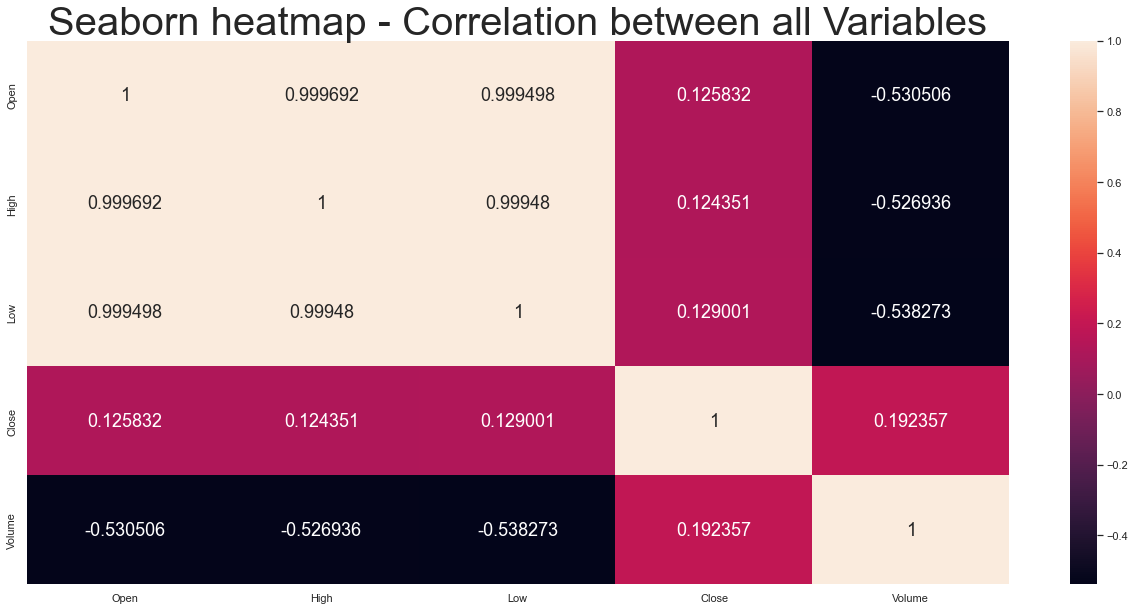

In [61]:
plt.figure(figsize=(22,10))
sns.heatmap(correlation, xticklabels=correlation.columns, yticklabels=correlation.columns, annot=True,annot_kws={"size": 18}, fmt='g')
plt.title('Seaborn heatmap - Correlation between all Variables', fontsize = 40)


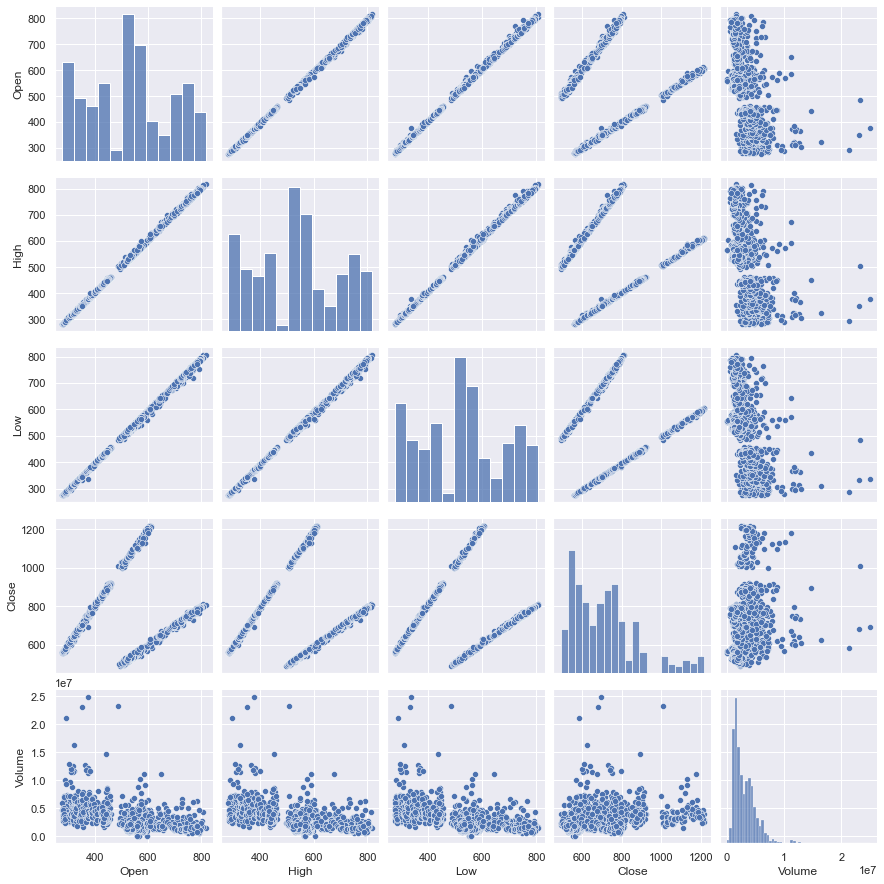

In [62]:
#Pair Grid
sns.pairplot(ff_dataset)

Some Graphs - using Full data set (ff_dataset)


In [63]:
columnnames =['Open', 'High', 'Low', 'Close', 'Volume']
#columnnames =list(ff_dataset.columns)

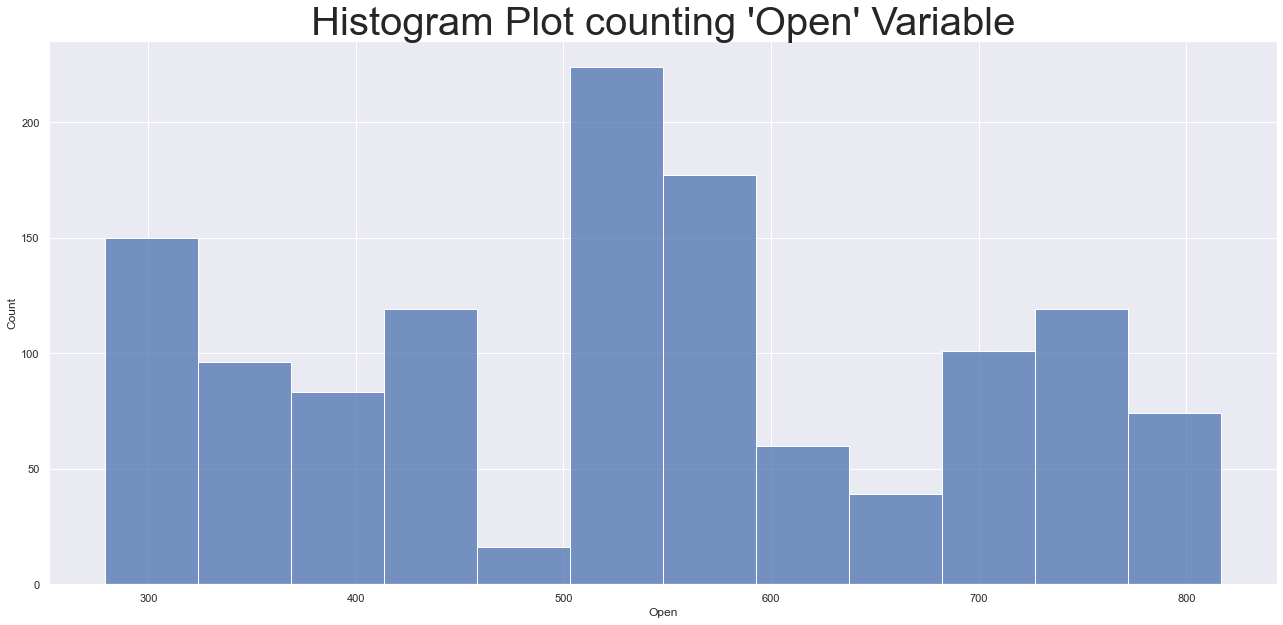

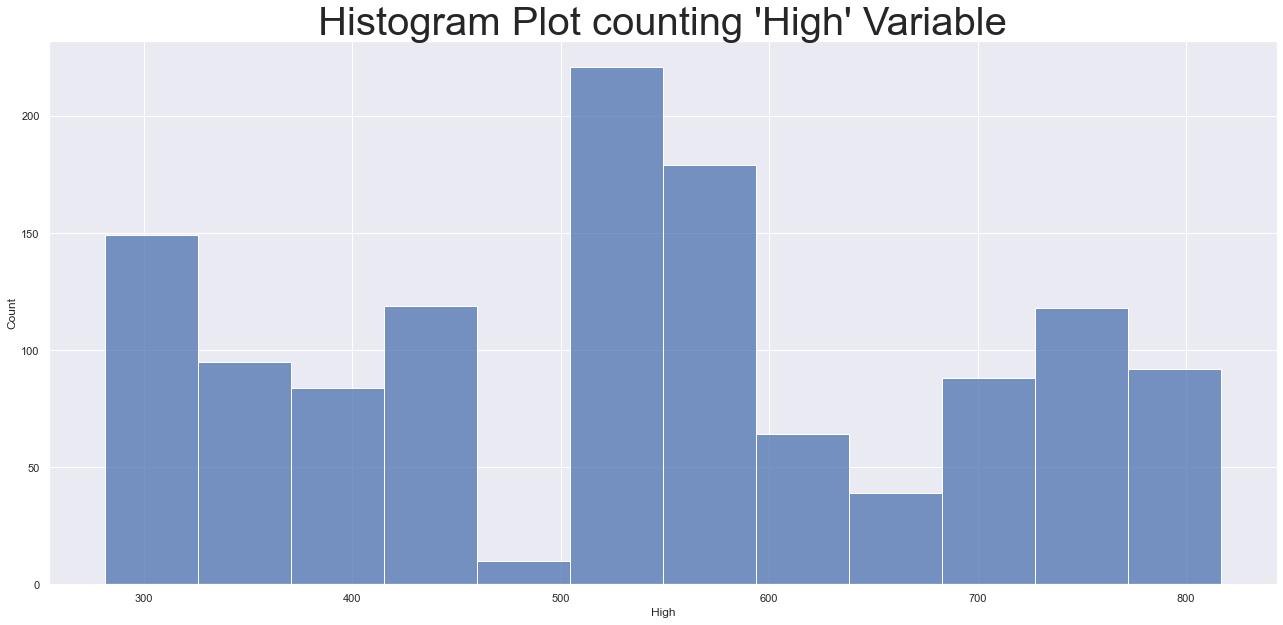

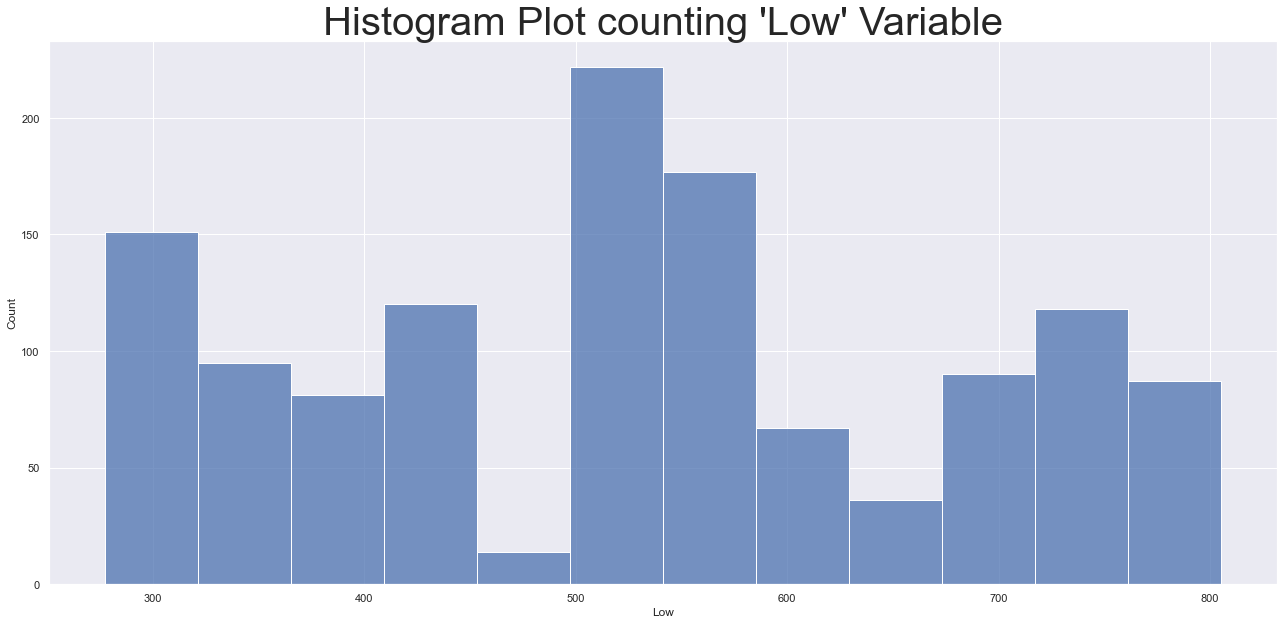

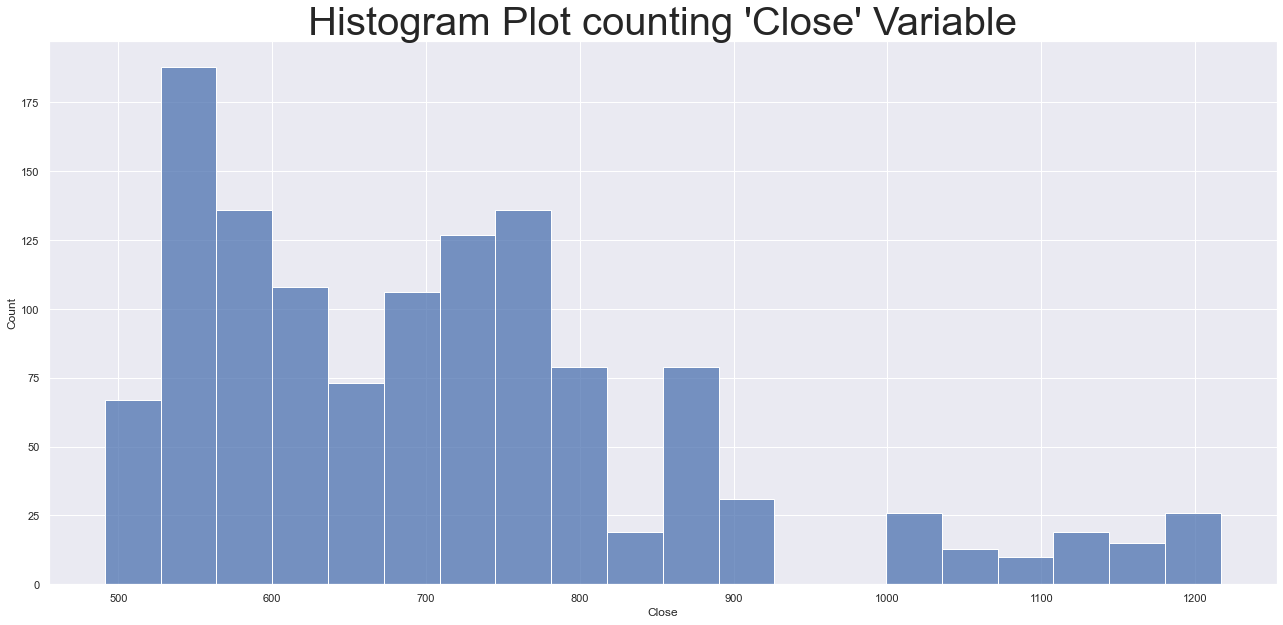

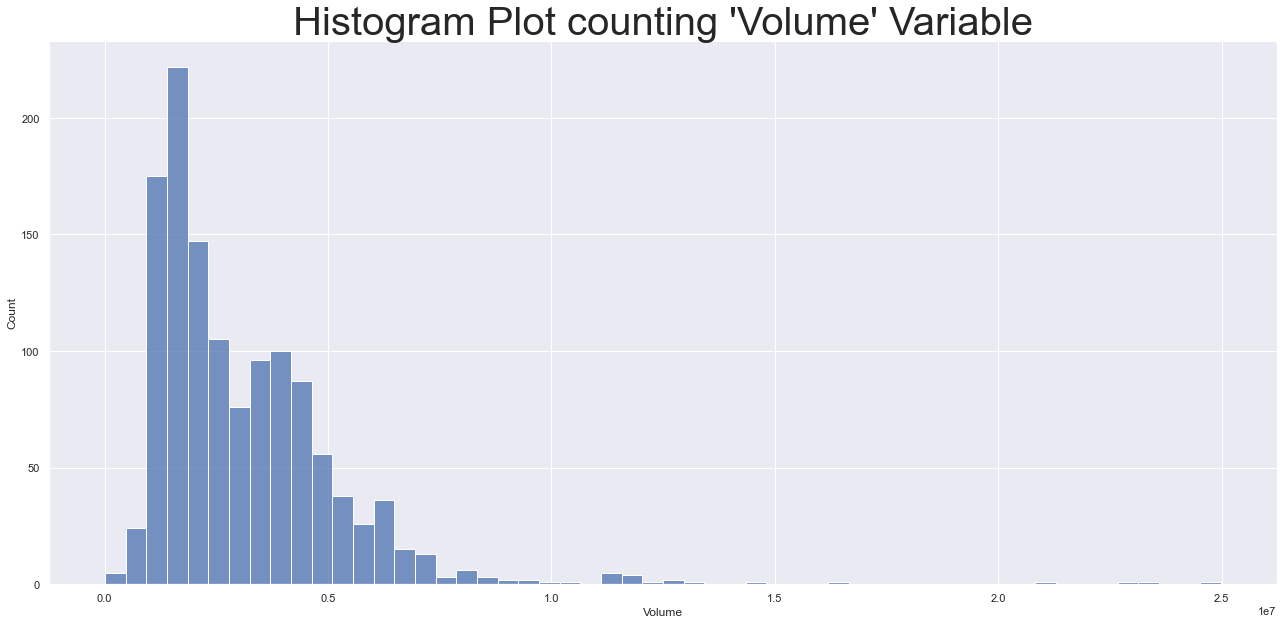

In [64]:
for columnname in columnnames:
    plt.figure(figsize=(22,10))
    sns.histplot(ff_dataset[columnname])
    plt.title("Histogram Plot counting '"+ columnname+ "' Variable", fontsize = 40)
    plt.show()

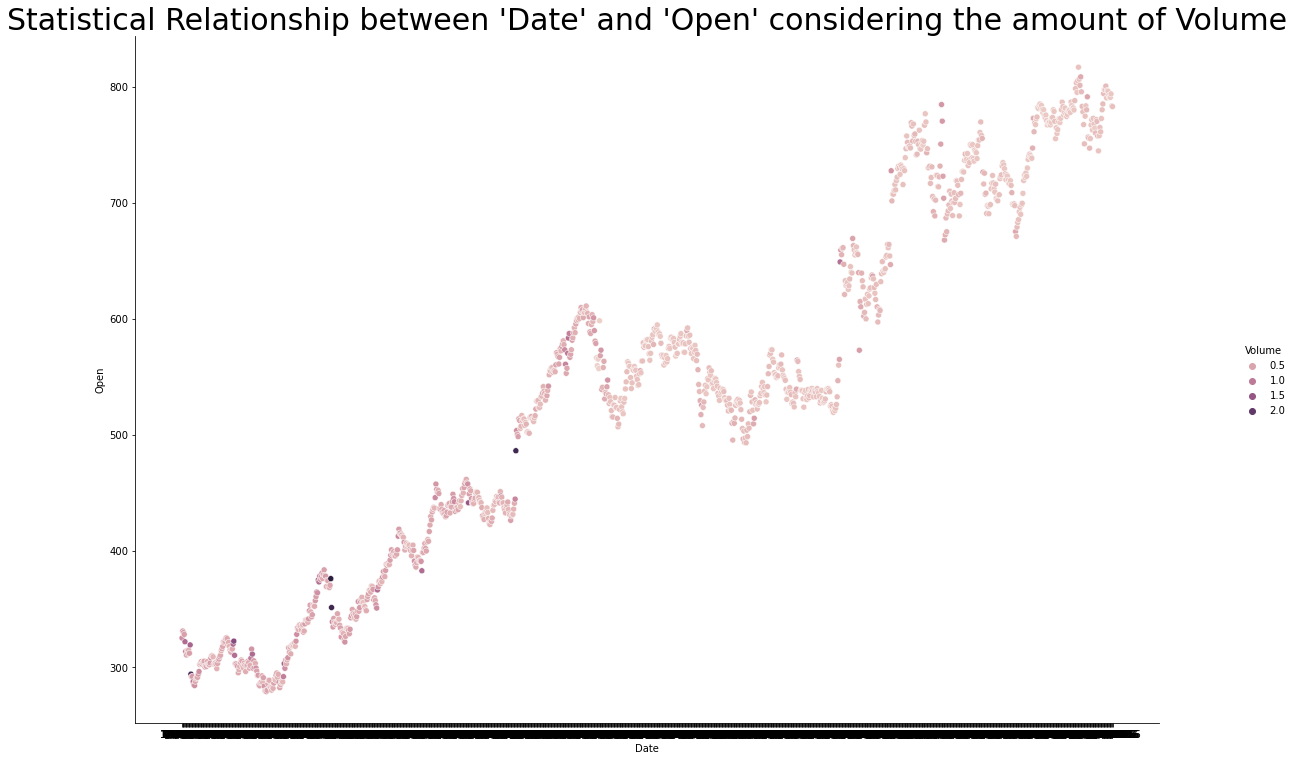

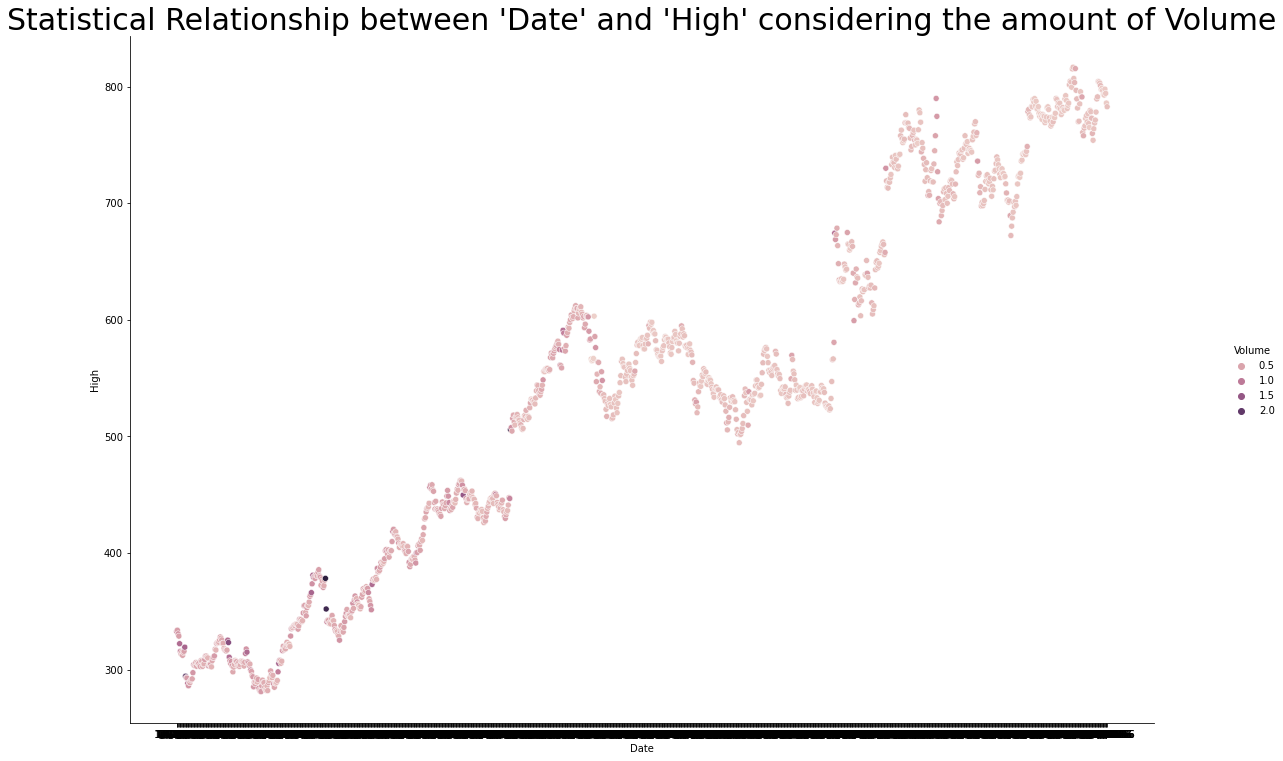

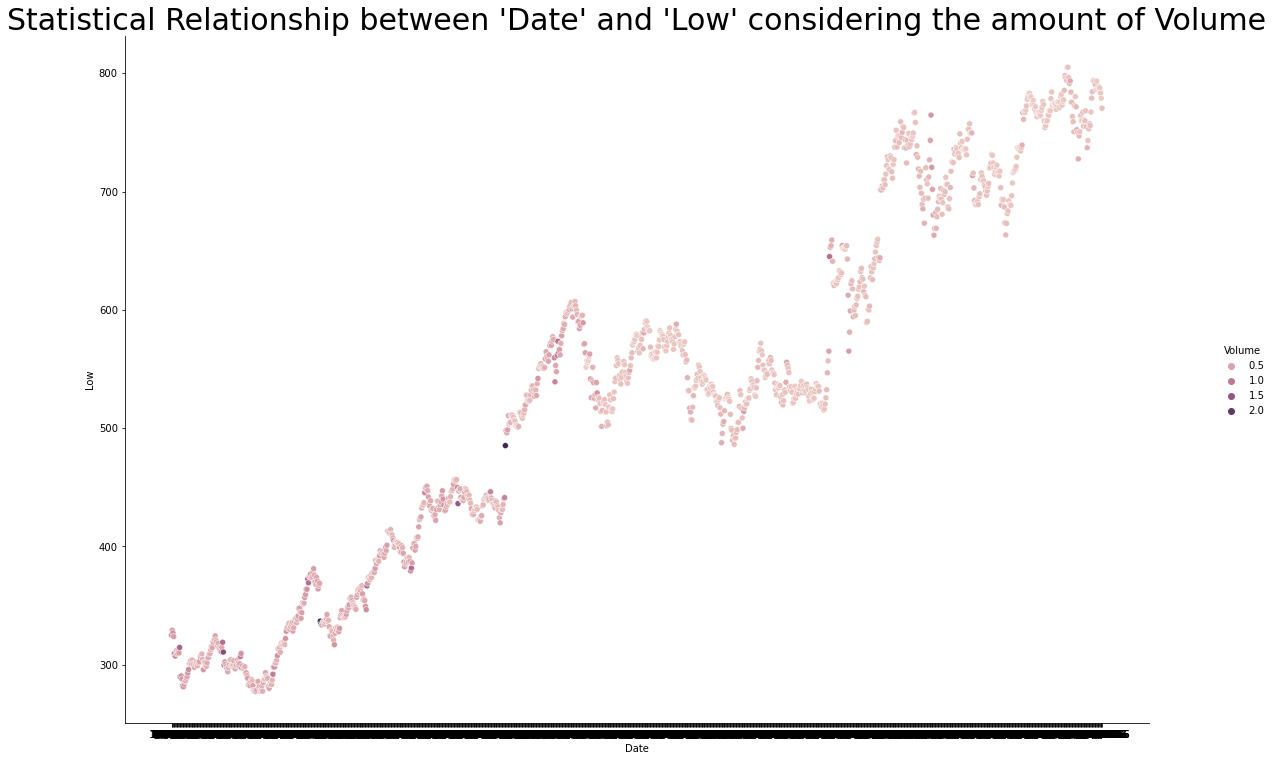

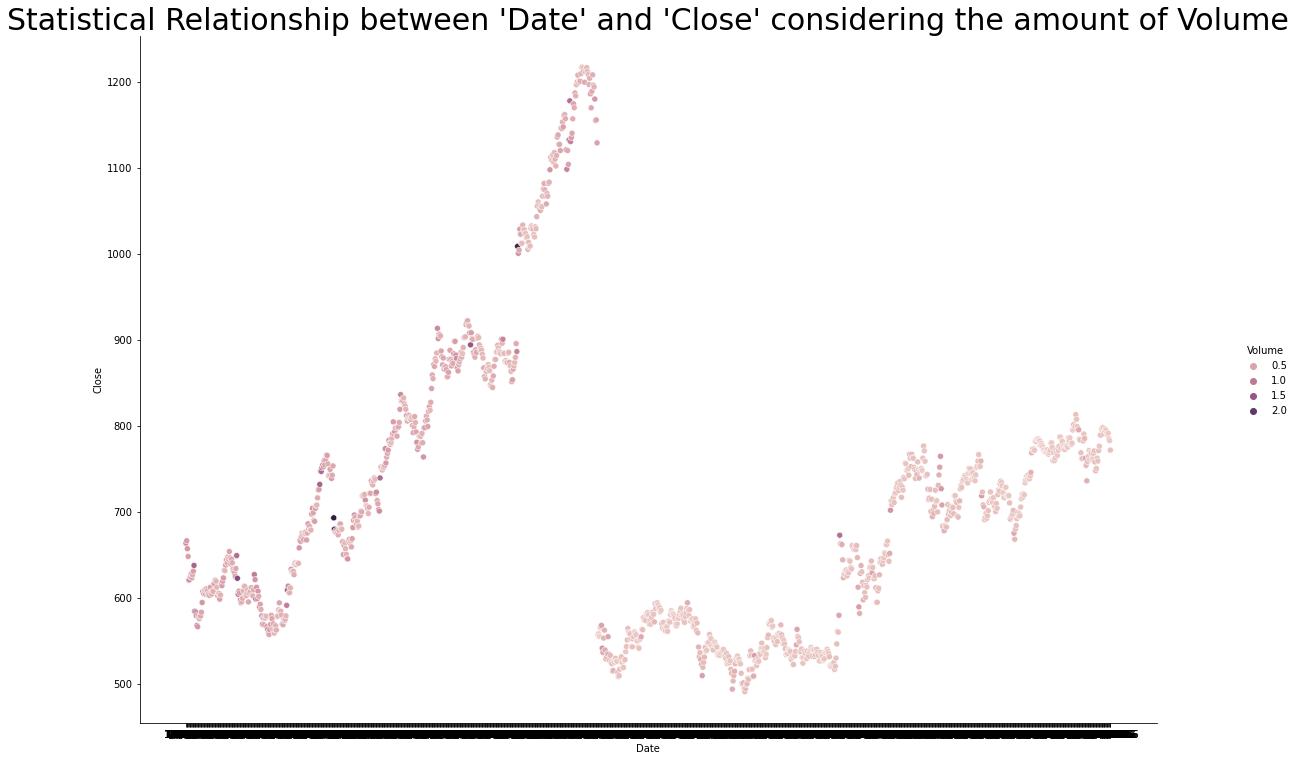

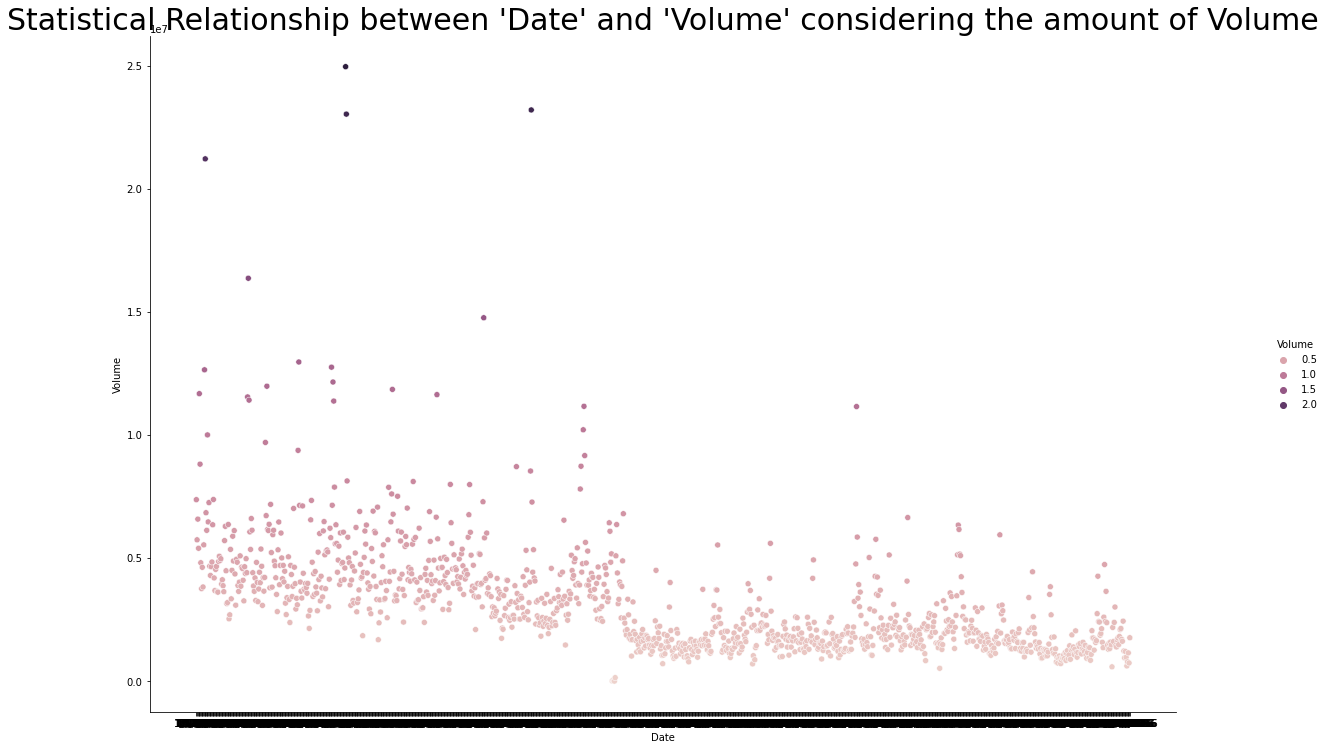

In [25]:
#plt.figure(figsize=(220,100))
for columnname in columnnames:
    sns.relplot(x='Date', y=columnname, hue='Volume', data=ff_dataset, height=10.27, aspect=10.7/7.27)
    plt.title("Statistical Relationship between 'Date' and '"+columnname+"' considering the amount of Volume", fontsize = 30)




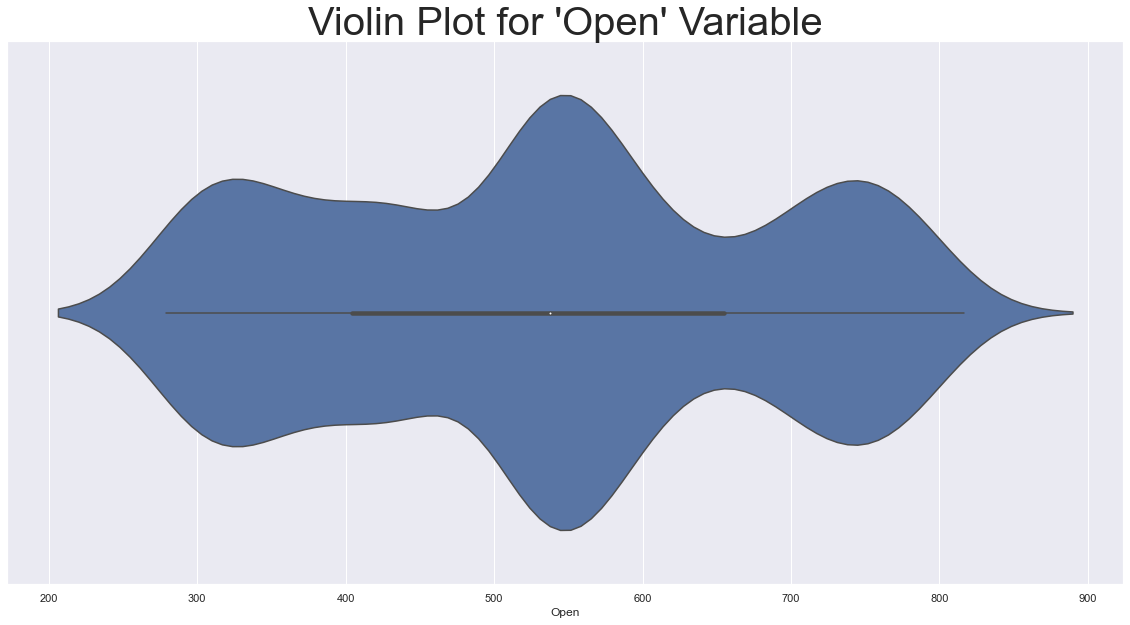

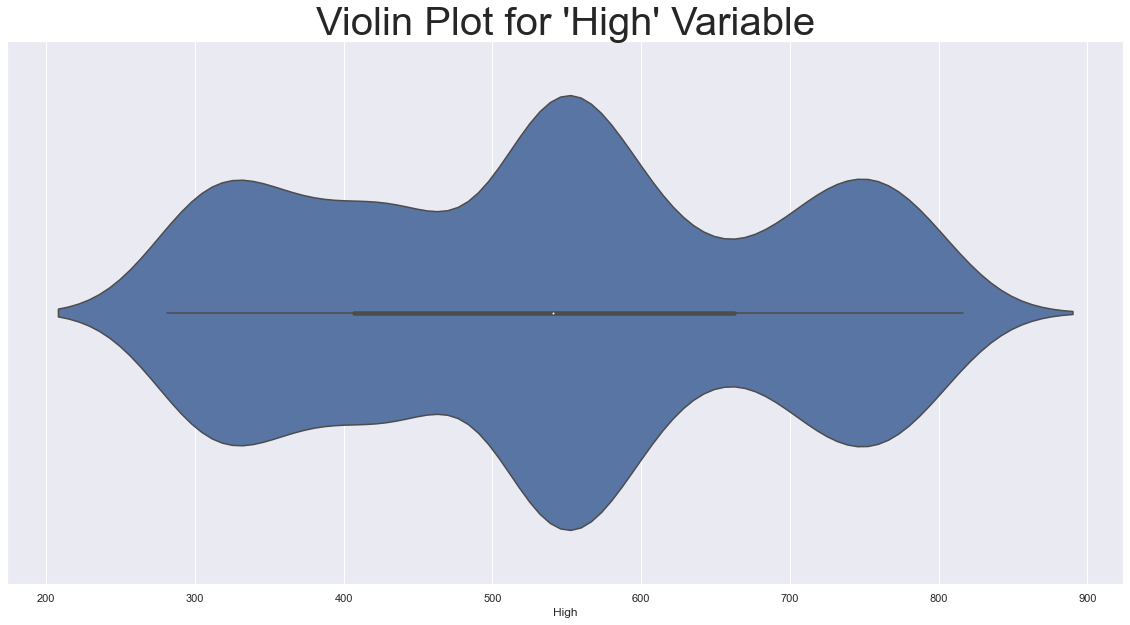

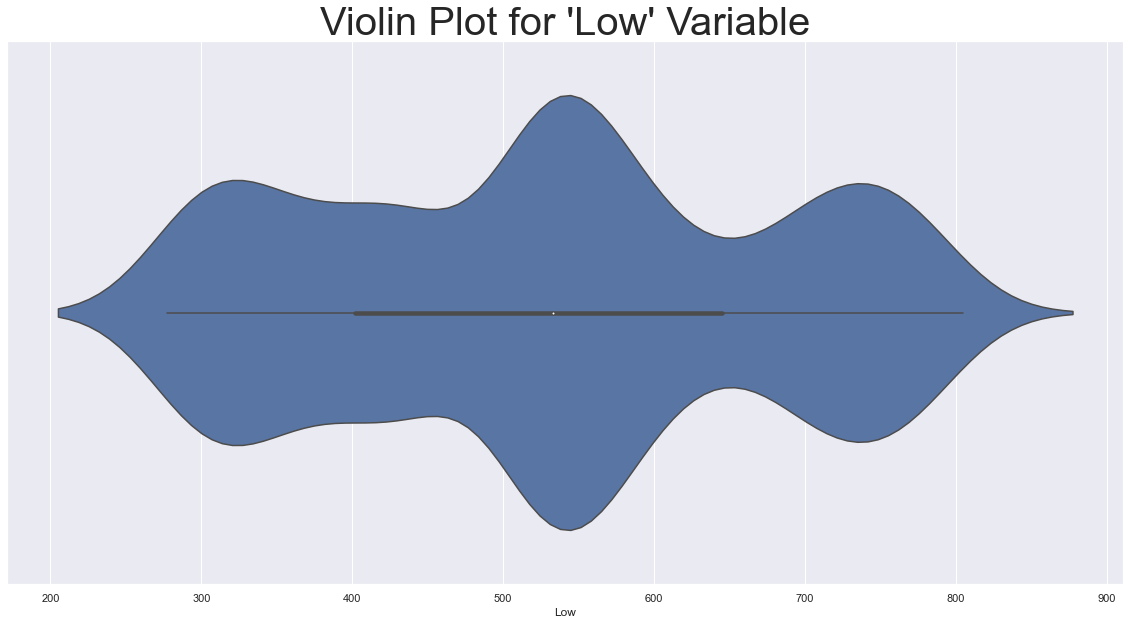

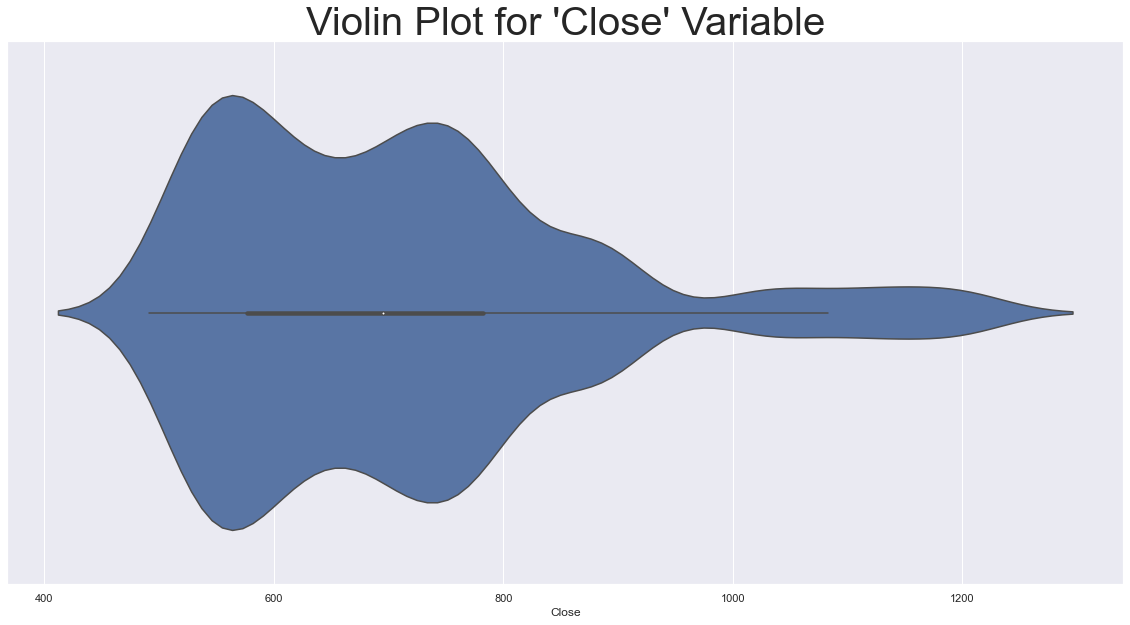

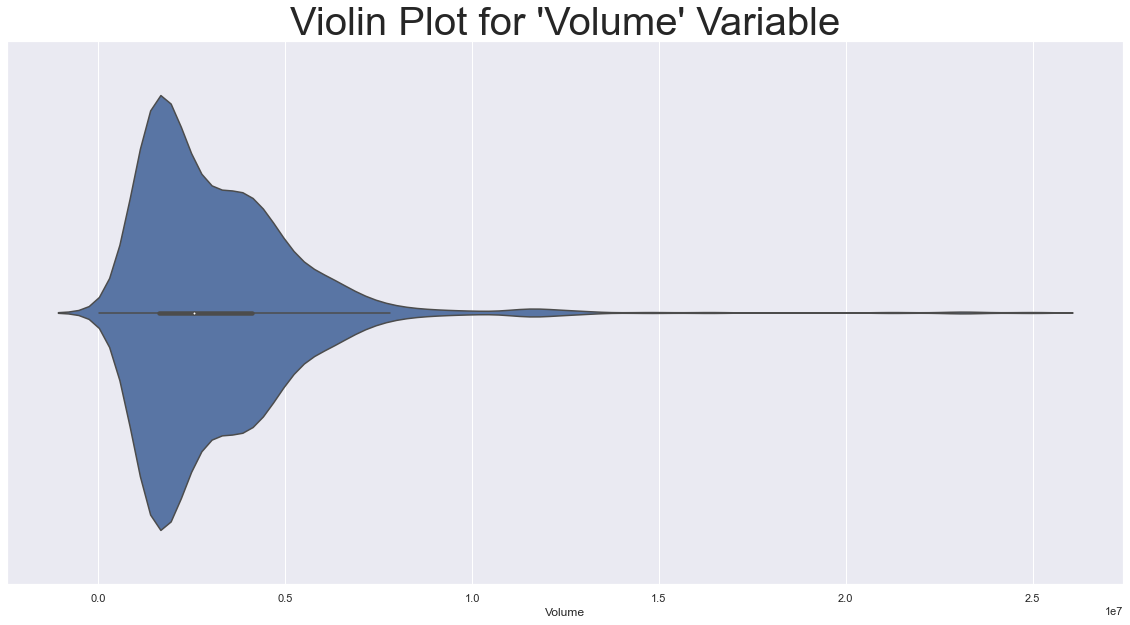

In [65]:
for columnname in columnnames:
  plt.figure(figsize=(20,10))
  sns.violinplot(x = columnname, data = ff_dataset)
  plt.title("Violin Plot for '"+ columnname+ "' Variable", fontsize = 40)
  plt.show()

In [66]:
volume = pd.DataFrame(ff_dataset.groupby("Volume").nunique().sort_values("Date", ascending=False).head())
#top_10

import plotly.express as px
segments = volume
fig = px.pie(segments, 
             values = volume["Volume"],
            names = volume.index,
            title = "Highest volume by Date",
            template = "seaborn")
fig.update_traces(rotation=-90, textinfo="percent+label")
fig.show()

In [67]:
#Convert timestemps and dataset index
ff_dataset['Date'] = ff_dataset.index
ff_dataset.head()

,Date,Open,High,Low,Close,Volume
0,0,325.25,332.83,324.97,663.59,7380500.0
1,1,331.27,333.87,329.08,666.45,5749400.0
2,2,329.83,330.75,326.89,657.21,6590300.0
3,3,328.34,328.77,323.68,648.24,5405900.0
4,4,322.04,322.29,309.46,620.76,11688800.0


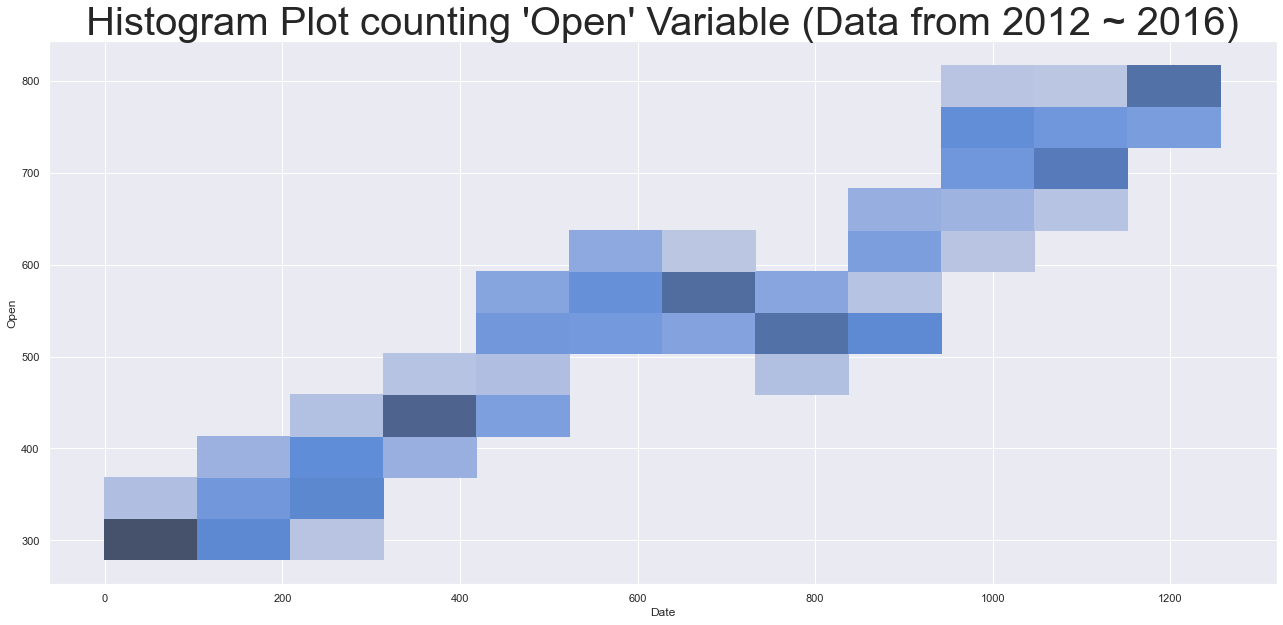

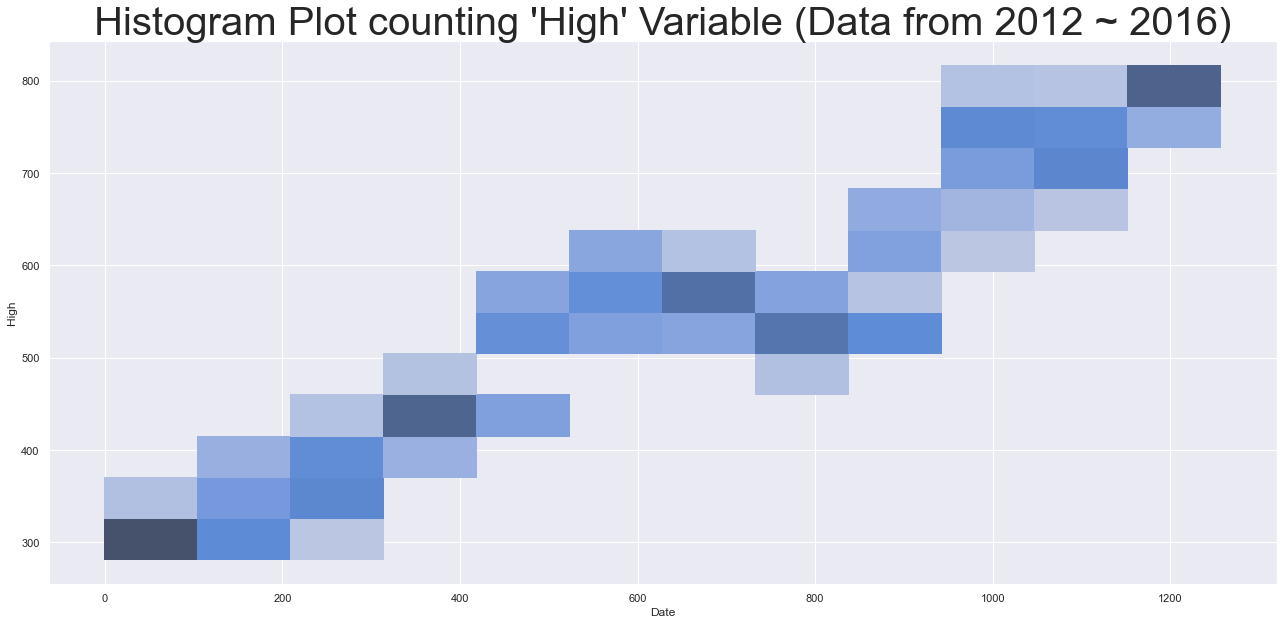

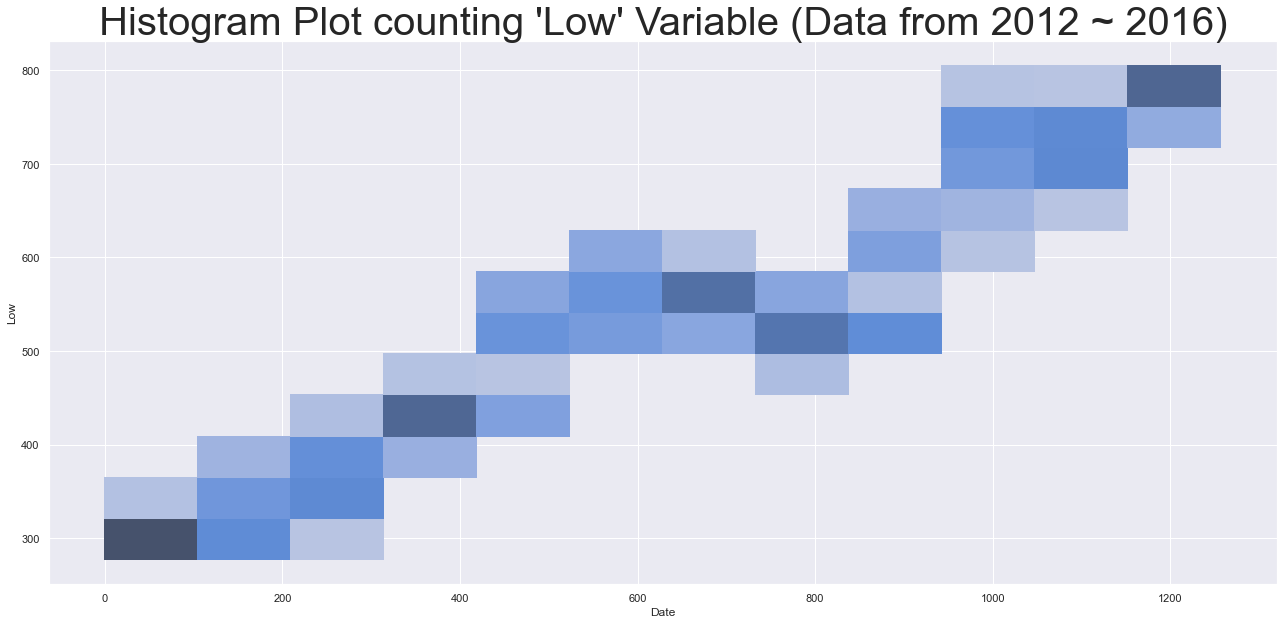

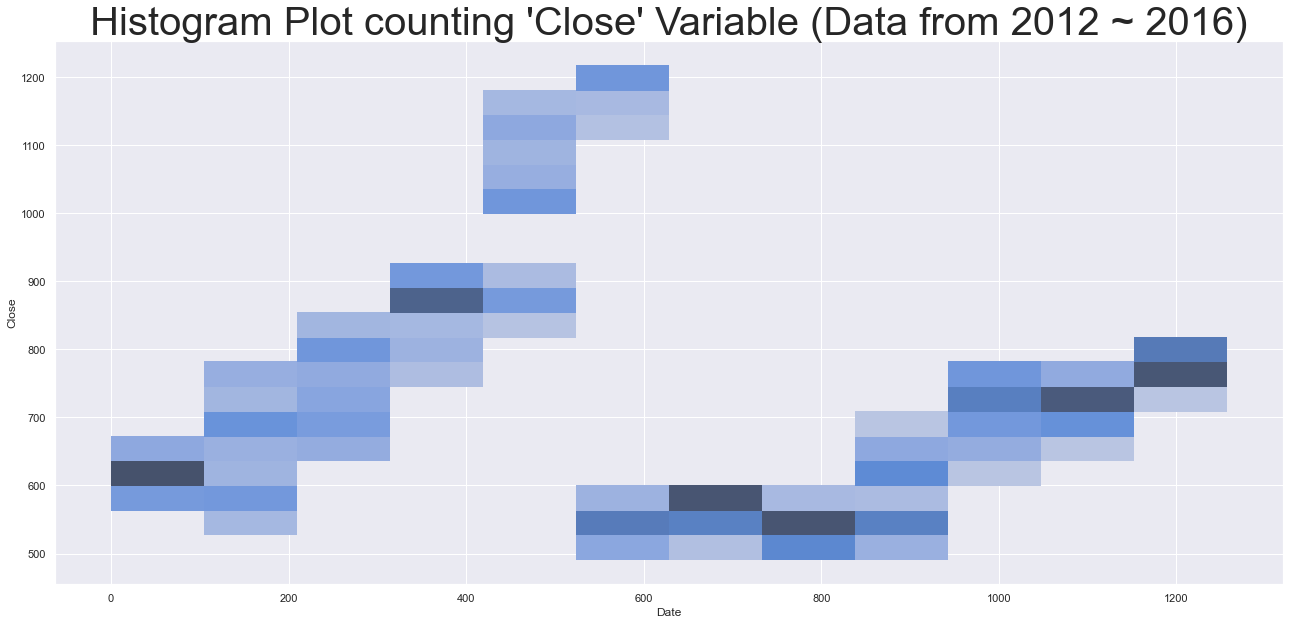

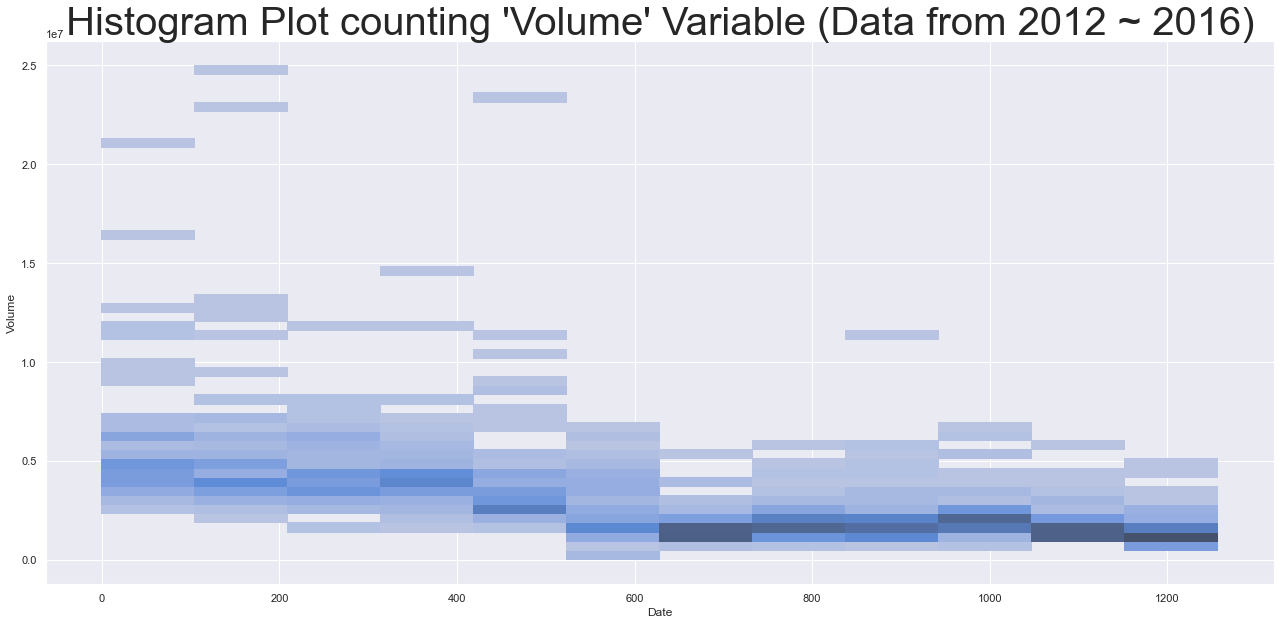

In [68]:
for columnname in columnnames:
    plt.figure(figsize=(22,10))
    sns.histplot(y=ff_dataset[columnname], x=ff_dataset['Date'])
    plt.title("Histogram Plot counting '"+ columnname+ "' Variable (Data from 2012 ~ 2016)", fontsize = 40)
    plt.show()

Identifying and removing outliers from dataset

In [69]:
def plot_boxplot(df, ft):
  df.boxplot(column=[ft])
  plt.grid(False)
  plt.show()

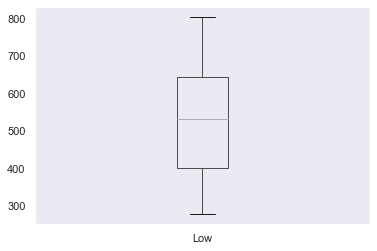

In [70]:
plot_boxplot(ff_dataset, "Low")

In [71]:
def outliers(df, ft):
  Q1 = df[ft].quantile(0.25)
  Q3 = df[ft].quantile(0.75)
  IQR = Q3-Q1

  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  ls = df.index[ (df[ft] < lower_bound) | (df[ft] > upper_bound)]
  return ls

In [72]:
index_list = []
for feature in ["Open", "High", "Low", "Close","Volume"]:
  index_list.extend(outliers(ff_dataset, feature))

In [73]:
def remove(df, ls):
  ls=sorted(set(ls))
  df=df.drop(ls)
  return df

In [74]:
df_cleaned = remove(ff_dataset, index_list)
df_cleaned.head()

,Date,Open,High,Low,Close,Volume
0,0,325.25,332.83,324.97,663.59,7380500.0
1,1,331.27,333.87,329.08,666.45,5749400.0
2,2,329.83,330.75,326.89,657.21,6590300.0
3,3,328.34,328.77,323.68,648.24,5405900.0
6,6,310.59,313.52,309.40,624.25,4817800.0


In [75]:
#dropping data column to not being incompatible with some processes
df_cleaned.drop('Date', axis=1, inplace=True)

In [76]:
df_cleaned.shape

(1163, 5)

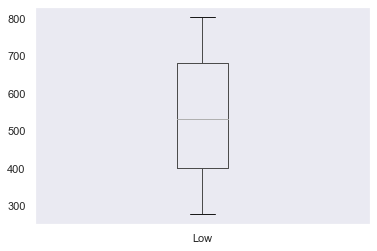

In [77]:
plot_boxplot(df_cleaned, 'Low')

In [78]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1163 entries, 0 to 1257
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1163 non-null   float64
 1   High    1163 non-null   float64
 2   Low     1163 non-null   float64
 3   Close   1163 non-null   float64
 4   Volume  1163 non-null   float64
dtypes: float64(5)
memory usage: 54.5 KB


Text(0.5, 1.0, 'Scatterplot comparing incidences of High against Low from dataset without outliers')

<Figure size 576x288 with 0 Axes>

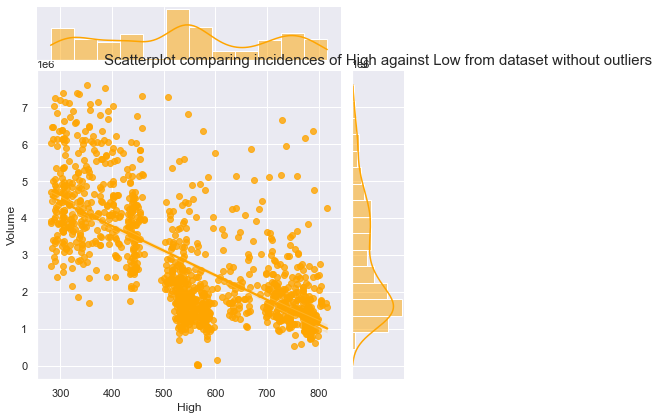

In [79]:
#Scatterplot comparing incidences of High against Low from dataset without outliers
sns.set_style('darkgrid')
plt.figure(figsize=(8,4))
sns.jointplot (x='High', y='Volume', data=df_cleaned, kind='reg', color='orange')
plt.title('Scatterplot comparing incidences of High against Low from dataset without outliers', fontsize = 15)

Text(0.5, 1.0, 'Pair Grid for dataset (without outliers)')

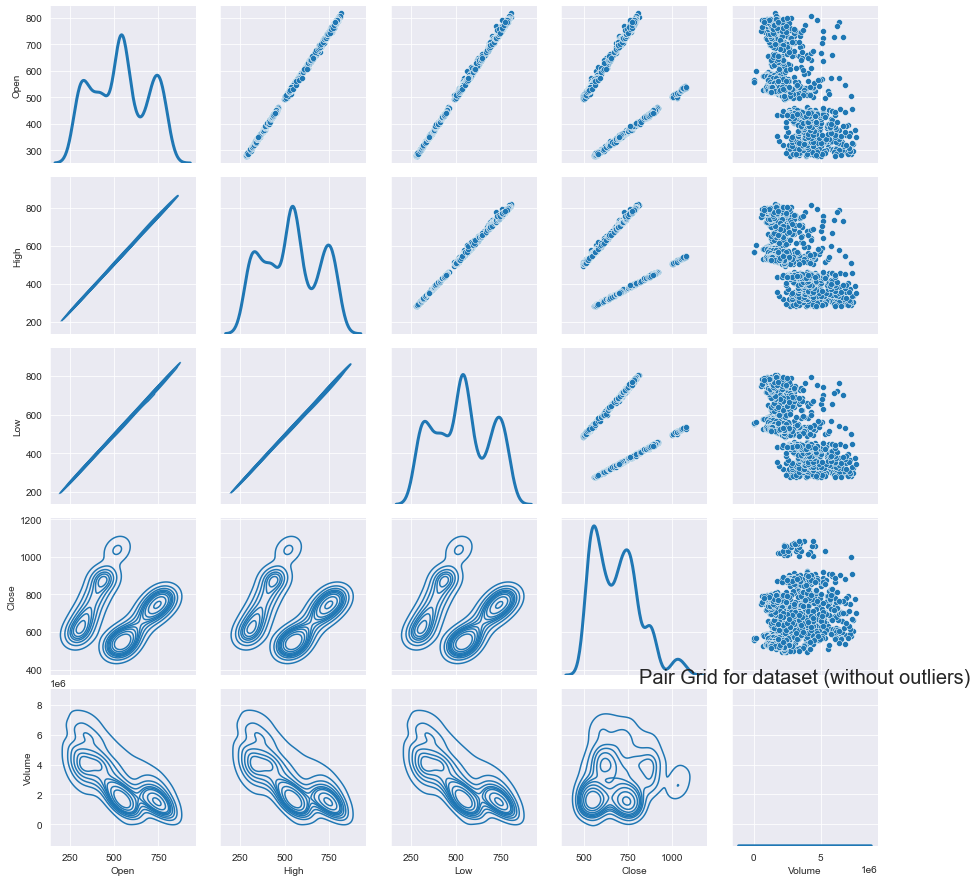

In [42]:
g = sns.PairGrid(df_cleaned)
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot)
g.map_diag(sns.kdeplot, lw=3, legend=False)
plt.title("Pair Grid for dataset (without outliers)", fontsize = 20)

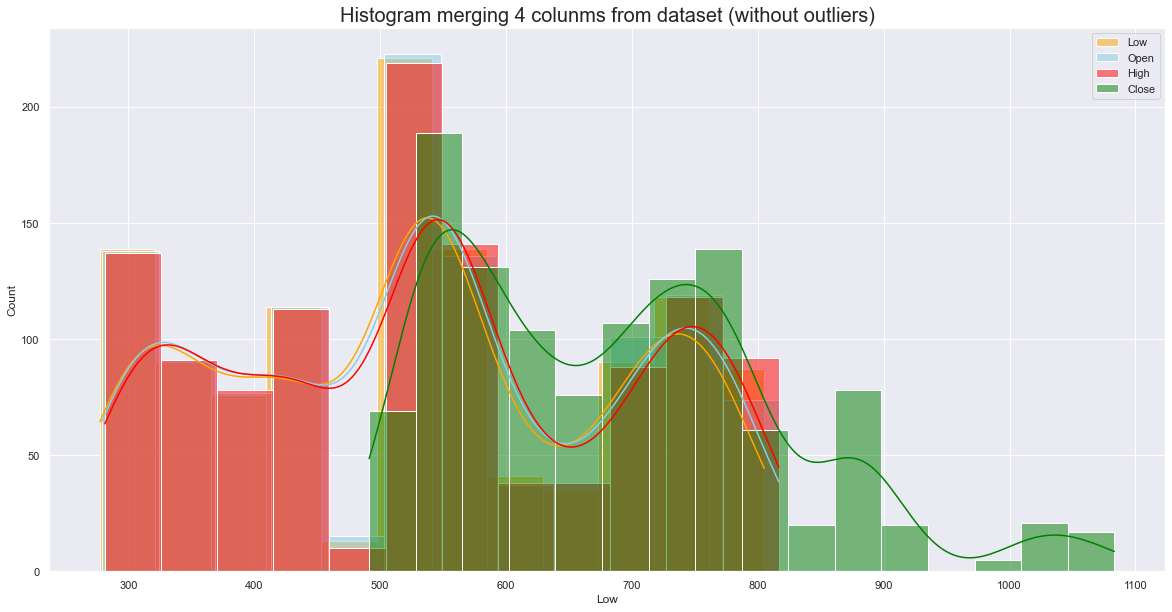

In [80]:
# set a grey background (use sns.set_theme() if seaborn version 0.11.0 or above) 
sns.set(style="darkgrid")
plt.figure(figsize=(20,10))
sns.histplot(data=df_cleaned, x="Low", color="orange", label="Low", kde=True)
sns.histplot(data=df_cleaned, x="Open", color="skyblue", label="Open", kde=True)
sns.histplot(data=df_cleaned, x="High", color="red", label="High", kde=True)
sns.histplot(data=df_cleaned, x="Close", color="green", label="Close", kde=True)
plt.title("Histogram merging 4 colunms from dataset (without outliers)", fontsize = 20)
plt.legend() 
plt.show()

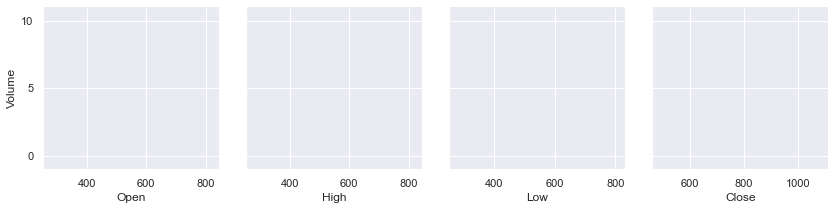

In [81]:
g = sns.PairGrid(df_cleaned, y_vars=["Volume"], x_vars=["Open", "High", "Low", "Close"], height=3)
g.map(sns.regplot, color=".3")
g.set(ylim=(-1, 11), yticks=[0, 5, 10])

In [82]:
df_cleaned.head

<bound method NDFrame.head of         Open    High     Low   Close     Volume
0     325.25  332.83  324.97  663.59  7380500.0
1     331.27  333.87  329.08  666.45  5749400.0
2     329.83  330.75  326.89  657.21  6590300.0
3     328.34  328.77  323.68  648.24  5405900.0
6     310.59  313.52  309.40  624.25  4817800.0
...      ...     ...     ...     ...        ...
1253  790.90  792.74  787.28  789.91   623400.0
1254  790.68  797.86  787.66  791.55   789100.0
1255  793.70  794.23  783.20  785.05  1153800.0
1256  783.33  785.93  778.92  782.79   744300.0
1257  782.75  782.78  770.41  771.82  1770000.0

[1163 rows x 5 columns]>

Finished outliers process

Data Normalization


In [83]:
from sklearn.preprocessing import Normalizer

scaler = Normalizer()

Norm = scaler.fit_transform(df_cleaned)

print(Norm)
print(len(Norm))

sns.displot(Norm, kde=True, height=10.27, aspect=10.7/7.27)
plt.title("Data Normalization for dataset (without outliers)", fontsize = 30)

[[4.40688297e-05 4.50958604e-05 4.40308919e-05 8.99112520e-05
  9.99999993e-01]
 [5.76181856e-05 5.80704067e-05 5.72372763e-05 1.15916442e-04
  9.99999988e-01]
 [5.00477971e-05 5.01873962e-05 4.96016869e-05 9.97238357e-05
  9.99999991e-01]
 ...
 [6.87900206e-04 6.88359557e-04 6.78799850e-04 6.80403246e-04
  9.99999065e-01]
 [1.05243620e-03 1.05592941e-03 1.04651119e-03 1.05171069e-03
  9.99997788e-01]
 [4.42231468e-04 4.42248417e-04 4.35259719e-04 4.36056329e-04
  9.99999615e-01]]


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x0000015A8F9C3040> (for post_execute):


KeyboardInterrupt: 

Min Max Scaler

[[0.08581368 0.09640129 0.09044931 0.29117473 0.96941566]
 [0.09701243 0.09834351 0.09823458 0.2960054  0.75494399]
 [0.09433366 0.09251685 0.09408623 0.28039861 0.86551307]
 ...
 [0.95725128 0.95807422 0.95844067 0.49632632 0.15067322]
 [0.93796041 0.94257381 0.95033338 0.49250908 0.09682849]
 [0.93688146 0.93669113 0.93421352 0.47398024 0.23169673]]
1163


Text(0.5, 1.0, 'Min Max Scaler for dataset (without outliers)')

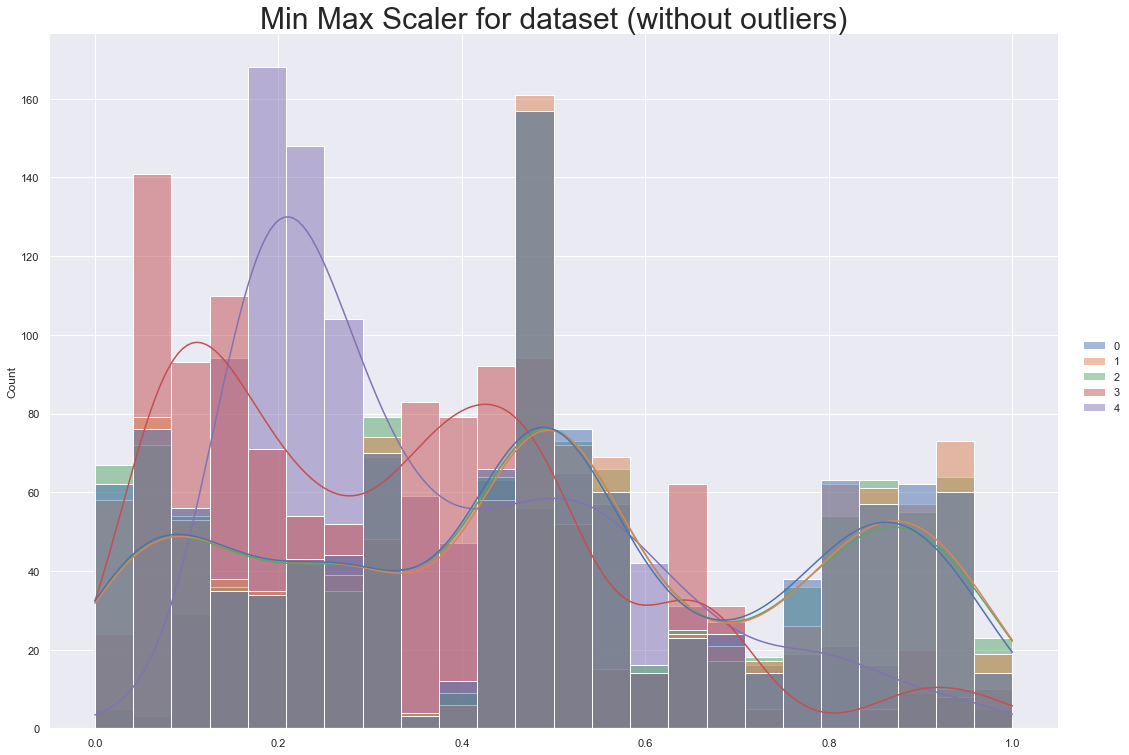

In [85]:
from numpy import asarray
from sklearn.preprocessing import MinMaxScaler
# define min max scaler
scaler = MinMaxScaler()
# transform data
MMscaled = scaler.fit_transform(df_cleaned)
print(MMscaled)
print(len(MMscaled))

sns.displot(MMscaled, kde=True, height=10.27, aspect=10.7/7.27)
plt.title("Min Max Scaler for dataset (without outliers)", fontsize = 30)

Data standardization

[[-1.35632047 -1.32459881 -1.34106055 -0.18234146  2.87483674]
 [-1.31743202 -1.31793034 -1.3142541  -0.16037978  1.83916665]
 [-1.32673424 -1.33793574 -1.32853783 -0.23133292  2.37309773]
 ...
 [ 1.66980861  1.63389224  1.64763052  0.75033911 -1.07881843]
 [ 1.60281969  1.58067275  1.61971528  0.73298477 -1.33883125]
 [ 1.59907296  1.56047499  1.56421093  0.64874712 -0.68756105]]


Text(0.5, 1.0, 'Data standardization for dataset (without outliers)')

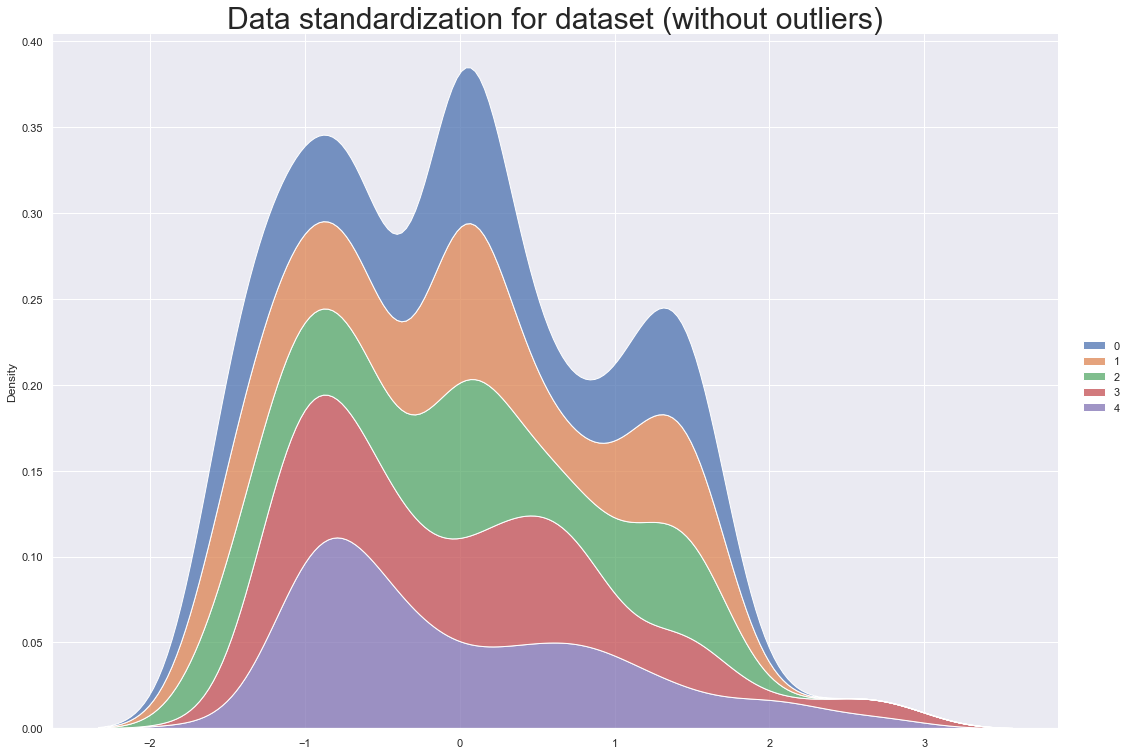

In [86]:
from numpy import asarray
from sklearn.preprocessing import StandardScaler
# define standard scaler
scaler = StandardScaler()
# transform data
Sscaled = scaler.fit_transform(df_cleaned)
print(Sscaled)
sns.displot(Sscaled, kind="kde", multiple="stack", height=10.27, aspect=10.7/7.27)
plt.title("Data standardization for dataset (without outliers)", fontsize = 30)


Robust Scaler

[[-0.73791206 -0.70913556 -0.73782243 -0.09549678  2.09706584]
 [-0.71681183 -0.70556309 -0.7231289  -0.0809768   1.41434013]
 [-0.72185906 -0.71628051 -0.7309583  -0.1278875   1.76631367]
 ...
 [ 0.904015    0.87580509  0.90038074  0.52114535 -0.50922942]
 [ 0.86766793  0.84729402  0.88507946  0.50967152 -0.68063287]
 [ 0.86563502  0.83647356  0.85465563  0.45397776 -0.25130802]]


Text(0.5, 1.0, 'Robust Scaler for dataset (without outliers)')

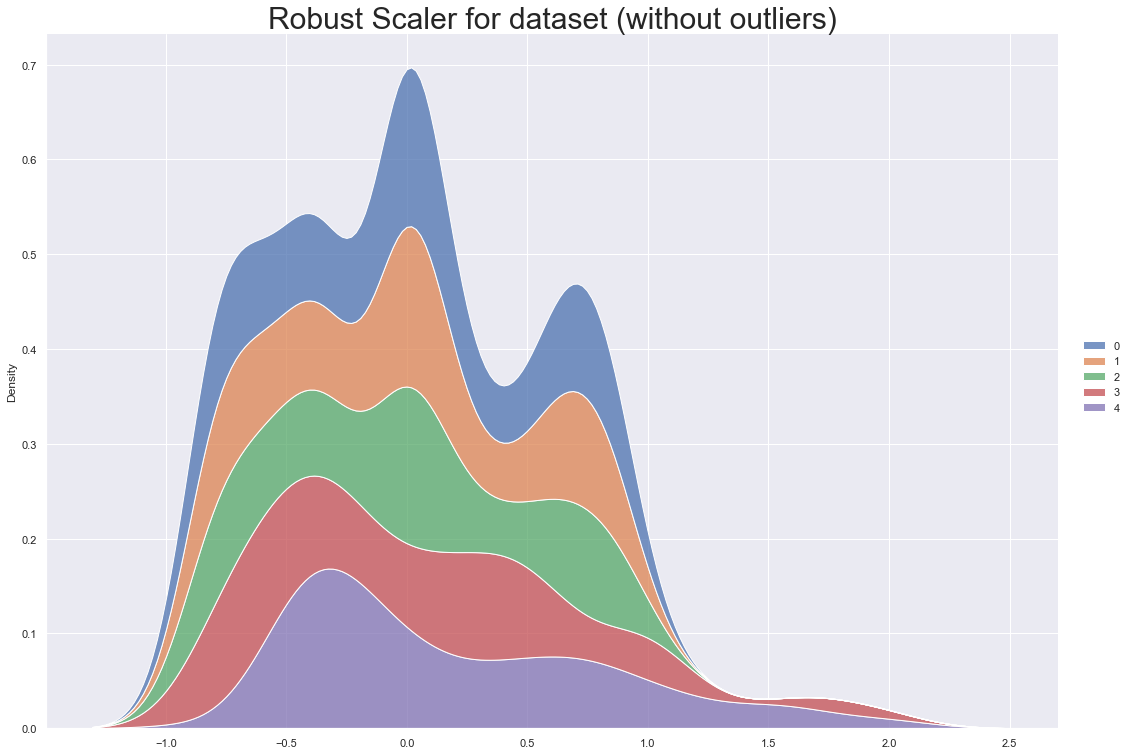

In [87]:
# Robust Scaler
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler().fit(df_cleaned)
Rscaler = scaler.transform(df_cleaned)
print(Rscaler)
sns.displot(Rscaler, kind="kde", multiple="stack", height=10.27, aspect=10.7/7.27)
plt.title("Robust Scaler for dataset (without outliers)", fontsize = 30)

Text(0.5, 1.0, 'Reg Plot Close price compraing with Volume (without outliers)')

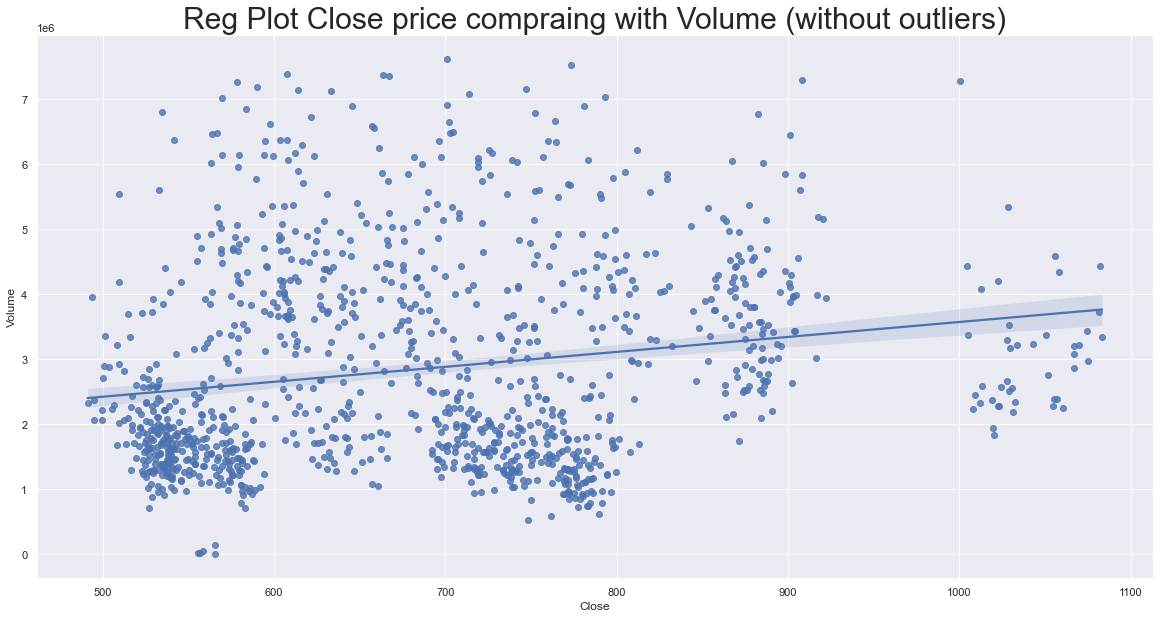

In [91]:
plt.figure(figsize=(20,10))
ax = sns.regplot(x="Close", y="Volume", data=df_cleaned)
plt.title("Reg Plot Close price compraing with Volume (without outliers)", fontsize = 30)

Function for Model Evaluation


In [92]:
def model_evaluation(classifier):
    cm = confusion_matrix(y_test, classifier.predict(X_test))
    counts = [value for value in cm.flatten()]
    labels = [f'{v1}' for v1 in counts]
    labels = np.asarray(labels).reshape(6,6)
    sns.heatmap(cm, annot = labels, cmap = 'Greens', fmt = '')

Pre Processing, defining Train and Test
Also checking dimension

In [93]:
X = ff_dataset.drop('Open', axis = 1)
y = ff_dataset['Open']
X.shape

(1258, 5)

In [94]:
y.shape

(1258,)

In [95]:
#Train size 80%, test size 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [96]:
X_train.shape


(1006, 5)

In [97]:
y_train.shape

(1006,)

In [98]:
X_test.shape

(252, 5)

In [99]:
y_test.shape

(252,)

References

https://www.stackvidhya.com/how-to-add-header-to-pandas-dataframe/;
https://www.addoptics.nl/optics-explained/refractive-index/
https://analyticsindiamag.com/exploring-dataprep-a-python-library-for-data-preparation-eda/#:~:text=DataPrep%20is%20an%20open%2Dsource,solved%20and%20taken%20care%20of.
https://www.analyticsvidhya.com/blog/2020/08/exploratory-data-analysiseda-from-scratch-in-python/
https://dzone.com/articles/python-class-attributes-vs-instance-attributes#:~:text=A%20class%20attribute%20is%20a,.)%20%2C%20of%20the%20class.
https://machinelearningmastery.com/difference-test-validation-datasets/
https://stringfixer.com/pt/Training_data
https://www.kdnuggets.com/2017/06/7-steps-mastering-data-preparation-python.html
https://towardsdatascience.com/visualizing-decision-trees-with-python-scikit-learn-graphviz-matplotlib-1c50b4aa68dc
https://baipureddyneeraj.medium.com/glass-classification-using-various-machine-learning-techniques-cf268fd520d6
https://www.kdnuggets.com/2020/07/easy-guide-data-preprocessing-python.html
https://community.developers.refinitiv.com/questions/71300/python-time-series-convert-date-index-to-pandas-co.html
https://machinelearningmastery.com/standardscaler-and-minmaxscaler-transforms-in-python/
https://stackoverflow.com/questions/13411544/delete-a-column-from-a-pandas-dataframe
https://towardsdatascience.com/feature-selection-correlation-and-p-value-da8921bfb3cf
https://moonbooks.org/Articles/How-to-increase-the-size-of-the-cells-text-annotations-of-a-seaborn-heatmap-in-python-/
https://seaborn.pydata.org/generated/seaborn.violinplot.html
https://deepnote.com/@econdesousa/ViolinPlotvsBoxPlot-aadf0c53-53b4-4221-89b9-4388c54c68bd
https://stackabuse.com/seaborn-violin-plot-tutorial-and-examples/
https://seaborn.pydata.org/tutorial/distributions.html
https://seaborn.pydata.org/tutorial/relational.html